# Classificadores estatísticos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import warnings
warnings.filterwarnings("ignore")
import statistical_classifiers as stat
import common as com

from sklearn import datasets

#x, y = datasets.load_iris(return_X_y=True)
#x = x[:,2:4]

#np.random.seed(12345)
#x, y = datasets.make_blobs(n_samples=60, centers=3, cluster_std=3)

#data_table = pd.read_csv('data/ex2data2.txt', header=None)
#x = data_table.drop(data_table.columns[-1], axis=1).values
#y = data_table.iloc[:,data_table.columns[-1]].values

data_table = pd.read_csv('data/blobs2.txt', header=None)
x = data_table.drop(data_table.columns[-1], axis=1).values
y = data_table.iloc[:,data_table.columns[-1]].values

labels = [0, 1, 2]
colors = ['green', 'blue', 'red']

def plot_data(x, y, marker='o', legend=False, only_data=False):
    plt.rcParams.update({'font.size': com.fontsize})
    for i, label in enumerate(labels):
        if only_data:
            plt.scatter(x[y == label,0], x[y == label,1],
                        s=10*com.markersize, marker=marker, color=colors[i])
        else:        
            plt.scatter(x[y == label,0], x[y == label,1],
                        s=10*com.markersize, marker=marker, color=colors[i])
    if legend:
        plt.legend()
        
    
fig = plt.figure(figsize=com.figsize)
plot_data(x, y)
#plt.savefig('figs/blobs2.png', dpi=com.dpi)
plt.show()
xlim = fig.gca().get_xlim() 
ylim = fig.gca().get_ylim() 

<Figure size 800x600 with 1 Axes>

In [2]:
np.random.seed(12345)

number_train = int(np.ceil(0.7*(x.shape[0])))
random_index = np.random.permutation(x.shape[0])
train_index = random_index[:number_train+1]
test_index = random_index[number_train+1:]

x_train = x[train_index]
x_test = x[test_index]
y_train = y[train_index]
y_test = y[test_index]

print("Número de padrões de treinamento: %d" % len(y_train))
print("Número de padrões de teste: %d" % len(y_test))

Número de padrões de treinamento: 106
Número de padrões de teste: 44


## Solução via Naive Bayes Gaussiano

Taxa de erro no treinamento: 10.38%
Taxa de erro no teste: 0.00%


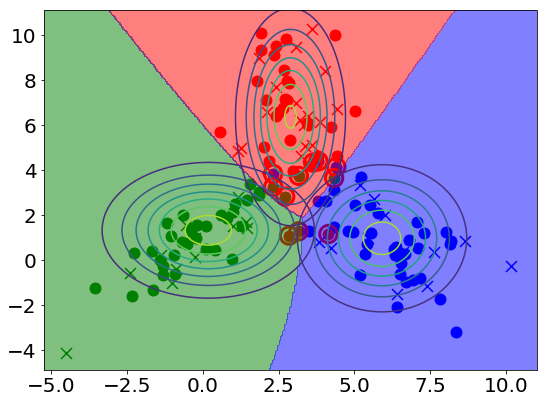

In [3]:
model_GNB = stat.create_GNB(x_train, y_train, class_prior='proportional')

wrong_index_train = y_train != stat.predict_GNB(model_GNB, x_train)
wrong_index_test = y_test != stat.predict_GNB(model_GNB, x_test)

plt.rcParams.update({'font.size': com.fontsize})
fig, ax = plt.subplots(figsize=com.figsize)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plot_data(x_train, y_train)
plot_data(x_test, y_test, marker='x', only_data=False, legend=False)
ax.scatter(x_train[wrong_index_train,0], x_train[wrong_index_train,1], s=300, facecolors='none', edgecolors='r', linewidth=3)
ax.scatter(x_test[wrong_index_test,0], x_test[wrong_index_test,1], s=300, facecolors='none', edgecolors='r', linewidth=3)
xx, yy = com.make_meshgrid(x[:,0], x[:,1])
com.plot_contours(ax, model_GNB, lambda x, model: np.array(stat.predict_GNB(model, x)), xx, yy, colors)
for k in range(model_GNB['K']):
    zz_gaussian_contours = multivariate_normal.pdf(np.c_[xx.ravel(), yy.ravel()],
                                                   mean=model_GNB['mu'][:,k],
                                                   cov=np.eye(x.shape[1])*model_GNB['var'][:,k])
    cs = ax.contour(xx, yy, zz_gaussian_contours.reshape(xx.shape))
    
#plt.savefig('figs/blobs2_GNB.png', dpi=com.dpi)
    
print("Taxa de erro no treinamento: %.2f%%" % (100*np.mean(wrong_index_train)))
print("Taxa de erro no teste: %.2f%%" % (100*np.mean(wrong_index_test)))

## Solução via Análise Discriminante Gaussiana

Taxa de erro no treinamento: 6.60%
Taxa de erro no teste: 0.00%


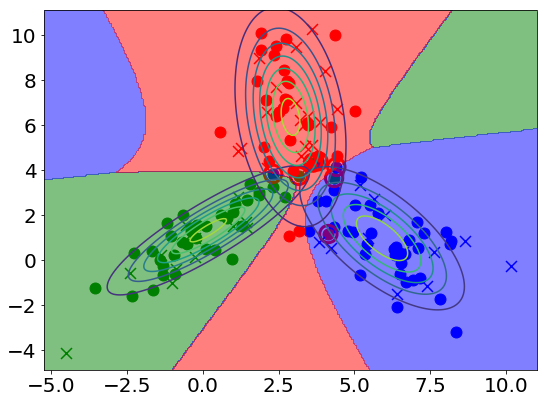

In [4]:
model_GDA = stat.create_GDA(x_train, y_train, class_prior='proportional')

wrong_index_train = y_train != stat.predict_GDA(model_GDA, x_train)
wrong_index_test = y_test != stat.predict_GDA(model_GDA, x_test)

plt.rcParams.update({'font.size': com.fontsize})
fig, ax = plt.subplots(figsize=com.figsize)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
plot_data(x_train, y_train)
plot_data(x_test, y_test, marker='x', only_data=False, legend=False)
ax.scatter(x_train[wrong_index_train,0], x_train[wrong_index_train,1], s=300, facecolors='none', edgecolors='r', linewidth=3)
ax.scatter(x_test[wrong_index_test,0], x_test[wrong_index_test,1], s=300, facecolors='none', edgecolors='r', linewidth=3)
xx, yy = com.make_meshgrid(x[:,0], x[:,1])
com.plot_contours(ax, model_GDA, lambda x, model: np.array(stat.predict_GDA(model, x)), xx, yy, colors)
for k in range(model_GNB['K']):
    zz_gaussian_contours = multivariate_normal.pdf(np.c_[xx.ravel(), yy.ravel()],
                                                   mean=model_GDA['mu'][:,k],
                                                   cov=model_GDA['var'][:,:,k])
    ax.contour(xx, yy, zz_gaussian_contours.reshape(xx.shape))

#plt.savefig('figs/blobs2_GDA.png', dpi=com.dpi)    
    
print("Taxa de erro no treinamento: %.2f%%" % (100*np.mean(wrong_index_train)))
print("Taxa de erro no teste: %.2f%%" % (100*np.mean(wrong_index_test)))